# 로지스틱 회귀란 무엇인가
로지스틱 회귀(Logistic Regression)는 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘이다.

- 로지스틱 회귀 분석은 이진 분류를 수행하는 데 사용된다. 즉, 데이터 샘플을 양성(1) 또는 음성(0) 클래스 둘 중 어디에 속하는지 예측한다.
- 각 속성(feature)들의 계수 log-odds를 구한 후 Sigmoid 함수를 적용하여 실제로 데이터가 해당 클래스에 속할 확률을 0과 1사이의 값으로 나타낸다.
- 손실함수(Loss Function)는 머신러닝 모델이 얼마나 잘 예측하는지 확인하는 방법이다. 로지스틱 회귀의 손실함수는 Log Loss이다.
- 데이터가 클래스에 속할지 말지 결정할 확률 컷오프를 Threshold(임계값)이라 한다. 기본 값은 0.5이지만 데이터의 특성이나 상황에 따라 조정할 수 있다.
- 파이썬 라이브러리 Scikit-learn을 통해 모델을 생성하고 각 속성(feature)들의 계수를 구할 수 있다. 이 때 각 계수(coefficients)들은 데이터를 분류함에 있어 해당 속성이 얼마나 중요한지 해석하는 데에 사용할 수 있다.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./titanic_train.csv')

X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [43]:
for col in X_train.columns:
    print("변수: {}, 타입: {}, 결측 개수: {}, 상태공간 크기: {}, 상태공간 일부: {}".format(col, X_train[col].dtype, X_train[col].isnull().sum(), len(X_train[col].unique()), X_train[col].unique()[:5]))

변수: PassengerId, 타입: int64, 결측 개수: 0, 상태공간 크기: 712, 상태공간 일부: [617  96  99 320   6]
변수: Pclass, 타입: int64, 결측 개수: 0, 상태공간 크기: 3, 상태공간 일부: [3 2 1]
변수: Name, 타입: object, 결측 개수: 0, 상태공간 크기: 712, 상태공간 일부: ['Danbom, Mr. Ernst Gilbert' 'Shorney, Mr. Charles Joseph'
 'Doling, Mrs. John T (Ada Julia Bone)'
 'Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)'
 'Moran, Mr. James']
변수: Sex, 타입: object, 결측 개수: 0, 상태공간 크기: 2, 상태공간 일부: ['male' 'female']
변수: Age, 타입: float64, 결측 개수: 140, 상태공간 크기: 85, 상태공간 일부: [34. nan 40. 32. 47.]
변수: SibSp, 타입: int64, 결측 개수: 0, 상태공간 크기: 7, 상태공간 일부: [1 0 2 8 3]
변수: Parch, 타입: int64, 결측 개수: 0, 상태공간 크기: 7, 상태공간 일부: [1 0 2 5 3]
변수: Ticket, 타입: object, 결측 개수: 0, 상태공간 크기: 567, 상태공간 일부: ['347080' '374910' '231919' '16966' '330877']
변수: Fare, 타입: float64, 결측 개수: 0, 상태공간 크기: 223, 상태공간 일부: [ 14.4      8.05    23.     134.5      8.4583]
변수: Cabin, 타입: object, 결측 개수: 554, 상태공간 크기: 123, 상태공간 일부: [nan 'E34' 'E33' 'B20' 'D11']
변수: Embarked, 타입: object, 결측 개수: 0, 상태공간 크기: 3, 

In [47]:
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

In [48]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [49]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
616,3,male,34.0,1,1,S
95,3,male,NaN,0,0,S
98,2,female,34.0,0,1,S
319,1,female,40.0,1,1,C
5,3,male,NaN,0,0,Q


In [50]:
# %pip install impyute
# %pip install missingno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from impyute.imputation.cs import mice
import missingno as msno

<AxesSubplot:>

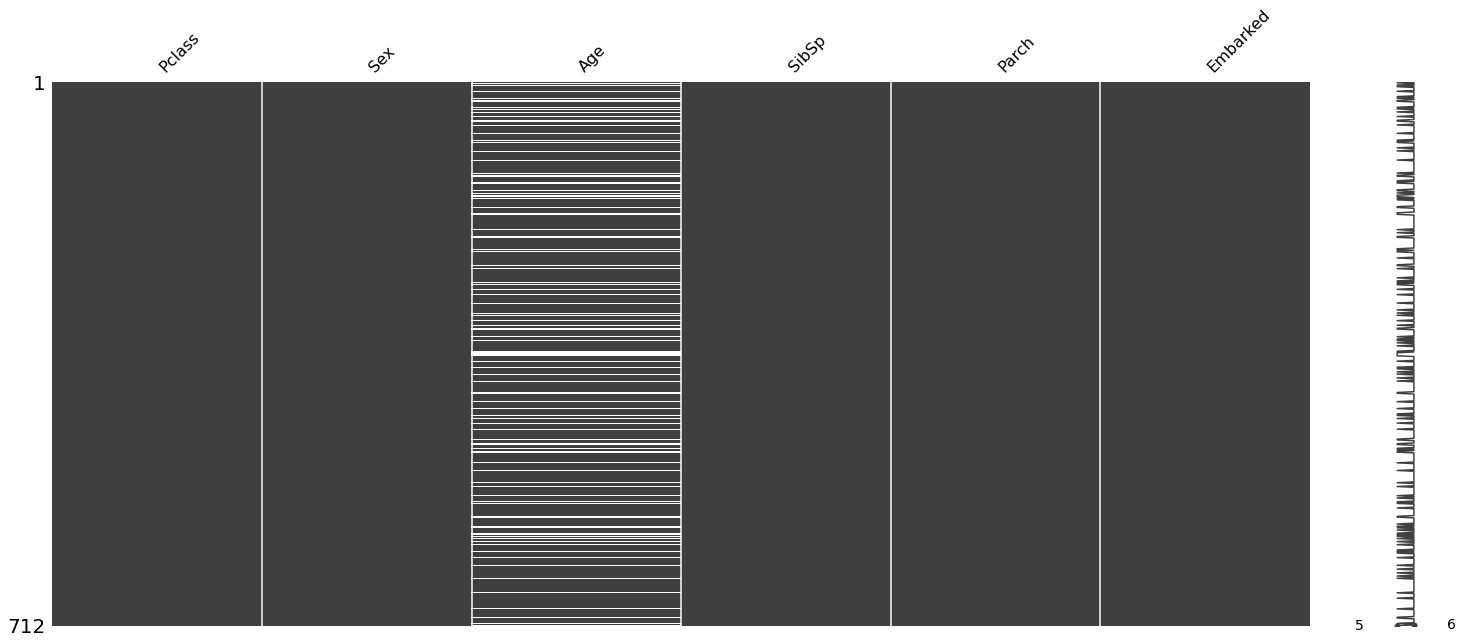

In [51]:
msno.matrix(X_train)

In [54]:
# total을 더미화
# 더미화하는 이유는 범주형 변수는 기계학습을 할 때 다룰 수 없기 때문에
dummy_X_train = pd.get_dummies(X_train, drop_first=True)
dummy_X_train

dummy_X_test = pd.get_dummies(X_test, drop_first=True)
dummy_X_test

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
375,1,NaN,1,0,0,0,0
276,3,45.0,0,0,0,0,1
239,2,33.0,0,0,1,0,1
386,3,1.0,5,2,1,0,1
651,2,18.0,0,1,0,0,1
...,...,...,...,...,...,...,...
557,1,NaN,0,0,1,0,0
718,3,NaN,0,0,1,1,0
538,3,NaN,0,0,1,0,1
759,1,33.0,0,0,0,0,1


In [59]:
II = IterativeImputer(verbose=False)
X_train_impute = pd.DataFrame(II.fit_transform(dummy_X_train), columns=dummy_X_train.columns)
X_test_impute = pd.DataFrame(II.transform(dummy_X_test), columns=dummy_X_train.columns)

In [61]:
X_train_impute.head()

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3.0,34.000000,1.0,1.0,1.0,0.0,1.0
1,3.0,27.859276,0.0,0.0,1.0,0.0,1.0
2,2.0,34.000000,0.0,1.0,0.0,0.0,1.0
3,1.0,40.000000,1.0,1.0,0.0,0.0,0.0
4,3.0,27.265816,0.0,0.0,1.0,1.0,0.0


<AxesSubplot:>

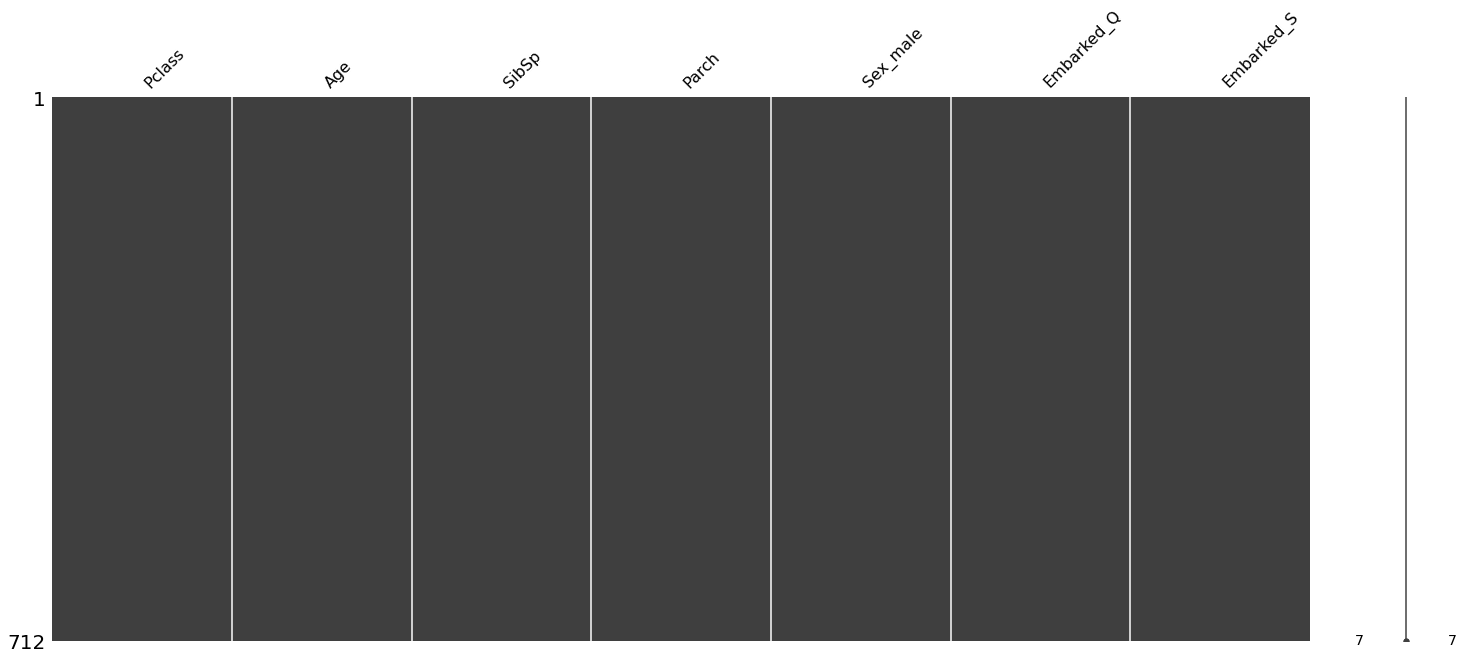

In [62]:
msno.matrix(X_train_impute)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_impute)
X_test_scaled = scaler.transform(X_test_impute)

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [67]:
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

0.8089887640449438
0.8044692737430168


In [68]:
print(model.coef_)

[[-0.98546961 -0.51287833 -0.39440144 -0.09765535 -1.28581373 -0.05189728
  -0.2508523 ]]


Conf mat:  [[94 16]
 [19 50]]
accuracy:  0.8044692737430168
precision:  0.7575757575757576
recall:  0.7246376811594203
f1 score:  0.7407407407407408
AUC:  0.7895915678524374


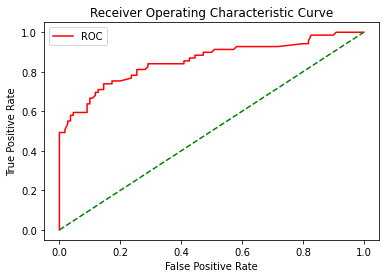

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

def classifier_eval(y_test, y_pred):
    print('Conf mat: ', confusion_matrix(y_test, y_pred))
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('precision: ', precision_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, y_pred))
    print('f1 score: ', f1_score(y_test, y_pred))
    print('AUC: ', roc_auc_score(y_test, y_pred))

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
classifier_eval(y_test, y_pred)
fper, tper, thresholds = roc_curve(y_test, y_prob)
plot_roc_curve(fper, tper)

## 로지스틱 회귀분석 대표 하이퍼 파라미터 종류
- penalty : 설정 가능 값 : 'l1', 'l2', 'elasticnet', 'none' , 기본 값 : 'l2'


1차, 2차, 1차+2차 혼합, 미규제 중에서 복잡한 모델에 대한 규제 방법을 선택

- C : penalty에 대한 계수 설정, 기본 값은 1.0, 높을 수록 복잡한 모델에 대한 규제 강화


- solver : 설정 가능 값 : ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ 기본 값 : 'lbfgs'


로지스틱 회귀는 비선형 방정식이라 근사 알고리즘으로 접근하는데, 알고리즘의 종류 선택
특정 solver는 일부 penalty 방식을 지원하지 않을 수도 있음

- random_state : 실행 시마다 결과를 고정하고 싶다면 임의의 정수로 설정


근사 알고리즘의 초기 상태가 실행 시마다 달라질 수 있어서 생기는 원리